In [4]:
import sys
sys.executable
print(sys.path)
sys.path.remove('C:\\Users\\weidewind\\AppData\\Roaming\\Python\\Python35\\site-packages')

['c:\\users\\weidewind\\appdata\\local\\continuum\\anaconda3\\envs\\aspen_env\\scripts\\python35.zip', 'C:\\Users\\weidewind\\AppData\\Local\\Continuum\\Anaconda3\\DLLs', 'C:\\Users\\weidewind\\AppData\\Local\\Continuum\\Anaconda3\\lib', 'C:\\Users\\weidewind\\AppData\\Local\\Continuum\\Anaconda3', 'c:\\users\\weidewind\\appdata\\local\\continuum\\anaconda3\\envs\\aspen_env', '', 'c:\\users\\weidewind\\appdata\\local\\continuum\\anaconda3\\envs\\aspen_env\\lib\\site-packages', 'c:\\users\\weidewind\\appdata\\local\\continuum\\anaconda3\\envs\\aspen_env\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\weidewind\\.ipython']


ValueError: list.remove(x): x not in list

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def get_pairs(source):
        result = []
        for p1 in range(len(source)):
                for p2 in range(p1+1,len(source)):
                        result.append([source[p1],source[p2]])
        return result

    
def get_edges(list1, list2):
    result = []
    for p1 in list1:
        for p2 in list2:
            if p1 != p2:
                result.append([p1,p2])
    return result



G = nx.Graph()

f = open("C:/Users/weidewind/workspace/aspenclust/output/rerooted/full/nsyn/likelihoods/graphs/h1_232.graph", "r")
lines = f.readlines()
anc = ""
for l in lines:
    subs = l.strip().split(':')[1]
    if l.startswith("Anc"):
        anc = subs
    else:
        nodes = []
        nonlonely = []
        aadict = dict()
        ders = subs.split(',')
        for i in range(len(ders)):
            aa = ders[i].split('|')[0]
            newnode = anc+"->"+ders[i]+"_"+str(i)
            if aa in aadict.keys():
                aadict[aa].append(newnode)
            else:
                aadict[aa] = [newnode]
            nodes.append(newnode)
        for aa in aadict.keys():
            if len(aadict[aa])>1:
                nonlonely.extend(aadict[aa])
        G.add_edges_from(get_edges(nodes, nonlonely))


    

    
    
    

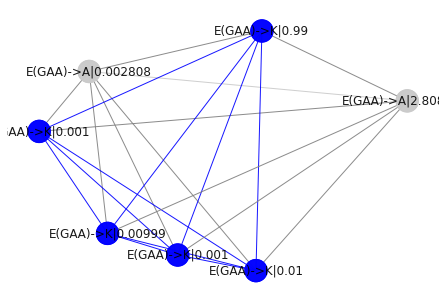

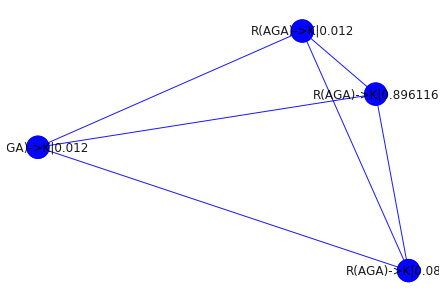

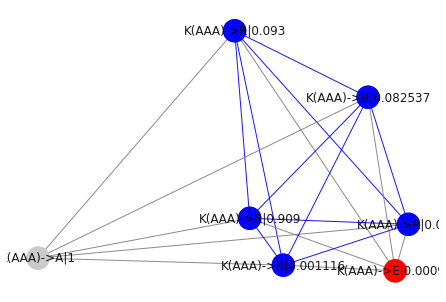

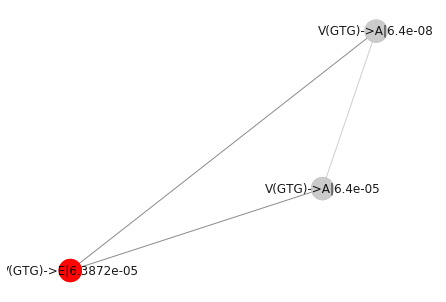

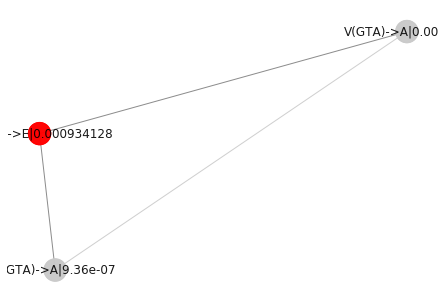

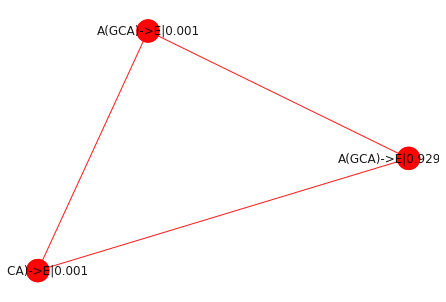

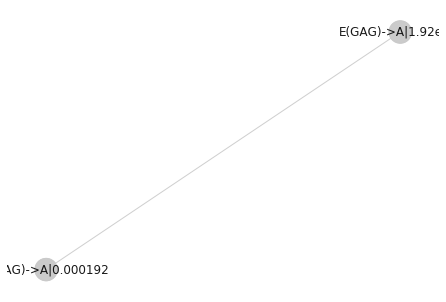

In [3]:
import re

def get_aa(nodename):
    return re.split('\||>',nodename)[1]



pos = nx.spring_layout(G,k=0.9,iterations=20)
plt.figure()   
colordict = {'E':'red', 'K':'blue', 'R':'blue', 'N':'cyan', 'Q':'cyan','T':'orange', \
             'Y':'#3232AA', 'I':'green', 'V':'green', 'L':'green', \
             'A':'#CACACA'} #http://life.nthu.edu.tw/~fmhsu/rasframe/SHAPELY.HTM

components = nx.connected_component_subgraphs(G) 
for c in components:
    nodes = c.nodes()
    colors = [colordict[get_aa(n)] for n in nodes]
    edges = c.edges()
    edge_colors = []
    for e in edges:
        if get_aa(e[0]) == get_aa(e[1]):
            edge_colors.append(colordict[get_aa(e[0])])
        else:
            edge_colors.append("gray")
    nx.draw(c,pos,edge_color=edge_colors, node_color = colors,width=1,linewidths=1,\
    node_size=500,alpha=0.9, \
    labels={node:node.split("_")[0] for node in c.nodes()})

    nx.draw_networkx_nodes(c,pos,
                           nodelist=nodes,
                           node_color=colors,
                           node_size=500,
                           font_size=22,
                       alpha=0.8)
    #nx.draw_networkx_edge_labels(G,pos,edge_labels={('A','B'):'AB',\
    #('B','C'):'BC',('B','D'):'BD'},font_color='red')
    plt.axis('off')
    plt.show()